In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
path = "C:\\Users\\rafae\\Downloads\\DadosICDSujos.xlsx"
df = pd.read_excel(path)
df.head()

,ID,Gênero,Idade,Tipo_Escola,Renda_Familiar,Horas_Estudo,Presença_Aulas,Nota_Avaliacao_1,Nota_Avaliacao_2,Atividade_Extra,Tempo_Lazer,Transporte_Escola
0,1,F,16,Pública,Baixa,5,90%,7.5,8.0,Sim,8 horas,Ônibus
1,2,M,17,Particular,Média,3,85%,6.0,6.5,Não,7 horas,Carro
2,3,F,15,Pública,Alta,8,95%,9.0,9.5,Sim,5 horas,Bicicleta
3,4,M,16,Particular,Média,2,70%,5.0,5.5,Não,6 horas,Carro
4,5,F,17,Pública,Baixa,6,80%,7.0,7.5,Sim,8 horas,Ônibus


In [47]:
df.isnull().sum()
df.fillna('N/A', inplace=True)

In [49]:
print(df['Idade'].unique())

[16 17 15 14]


In [51]:
df['Idade'] = df['Idade'].replace(-15, 15)
df['Idade'] = df['Idade'].replace(160, 16)

In [53]:
print(df['Tipo_Escola'].unique())

['Pública' 'Particular']


In [55]:
df = df.replace('particuuular', 'Particular')
df = df.replace('pub', 'Pública')
df = df.replace('pblica', 'Pública')

In [57]:
print(df['Horas_Estudo'].unique())

[5 3 8 2 6 4 7]


In [59]:
df = df.replace(4000, 4)

In [61]:
df.to_excel('DadosICDTratados.xlsx', index=False)

In [117]:
path = "C:\\Users\\rafae\\Downloads\\DadosICDTratados.xlsx"
df = pd.read_excel(path)
df.head()

,ID,Gênero,Idade,Tipo_Escola,Renda_Familiar,Horas_Estudo,Presença_Aulas,Nota_Avaliacao_1,Nota_Avaliacao_2,Atividade_Extra,Tempo_Lazer,Transporte_Escola
0,1,F,16,Pública,Baixa,5,90%,7.5,8.0,Sim,8 horas,Ônibus
1,2,M,17,Particular,Média,3,85%,6.0,6.5,Não,7 horas,Carro
2,3,F,15,Pública,Alta,8,95%,9.0,9.5,Sim,5 horas,Bicicleta
3,4,M,16,Particular,Média,2,70%,5.0,5.5,Não,6 horas,Carro
4,5,F,17,Pública,Baixa,6,80%,7.0,7.5,Sim,8 horas,Ônibus


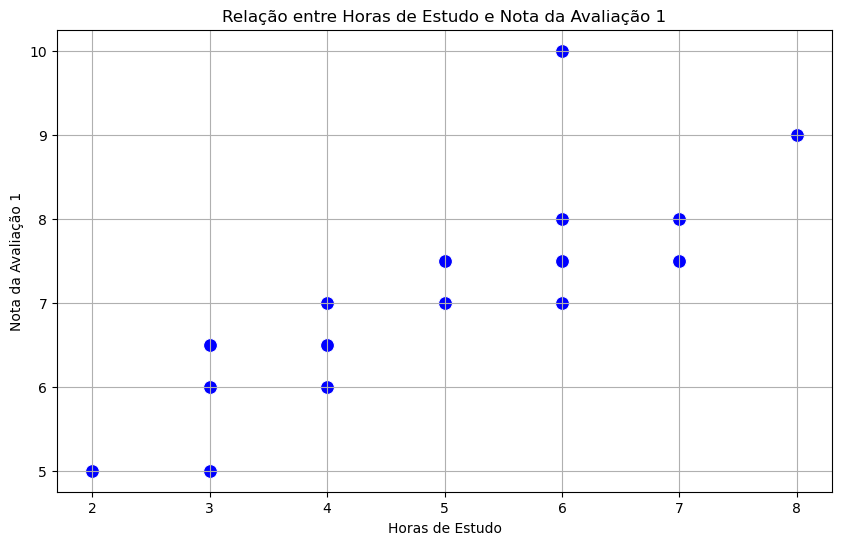

In [67]:
#Qual é a relação entre Horas_Estudo e Nota_Avaliacao_1 ?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horas_Estudo', y='Nota_Avaliacao_1', data=df, s=100, color='blue')

plt.title('Relação entre Horas de Estudo e Nota da Avaliação 1')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota da Avaliação 1')

plt.grid(True)

plt.show()

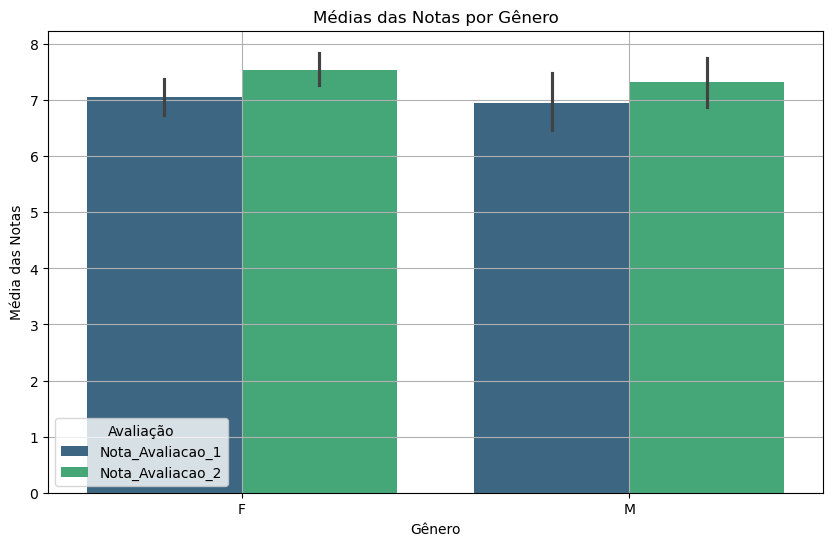

In [69]:
#2. Existe alguma diferença significativa entre os gêneros em relação às notas?
df_long = df.melt(id_vars=['Gênero'], value_vars=['Nota_Avaliacao_1', 'Nota_Avaliacao_2'],
                  var_name='Avaliação', value_name='Nota')

plt.figure(figsize=(10, 6))
sns.barplot(x='Gênero', y='Nota', hue='Avaliação', data=df_long, palette='viridis')

plt.title('Médias das Notas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média das Notas')

plt.grid(True)

plt.show()

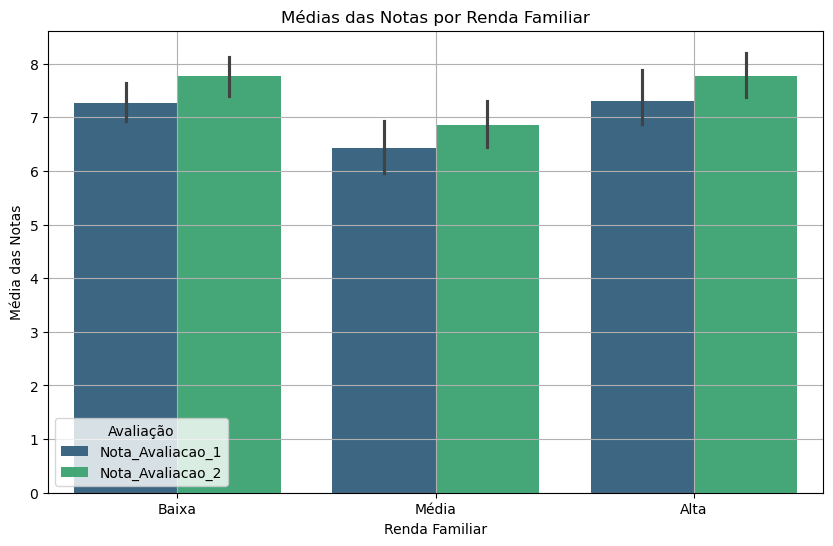

In [71]:
#3. Como a renda familiar influencia o desempenho escolar?
df_long = df.melt(id_vars=['Renda_Familiar'], value_vars=['Nota_Avaliacao_1', 'Nota_Avaliacao_2'],
                  var_name='Avaliação', value_name='Nota')

plt.figure(figsize=(10, 6))
sns.barplot(x='Renda_Familiar', y='Nota', hue='Avaliação', data=df_long, palette='viridis')

plt.title('Médias das Notas por Renda Familiar')
plt.xlabel('Renda Familiar')
plt.ylabel('Média das Notas')

plt.grid(True)

plt.show()

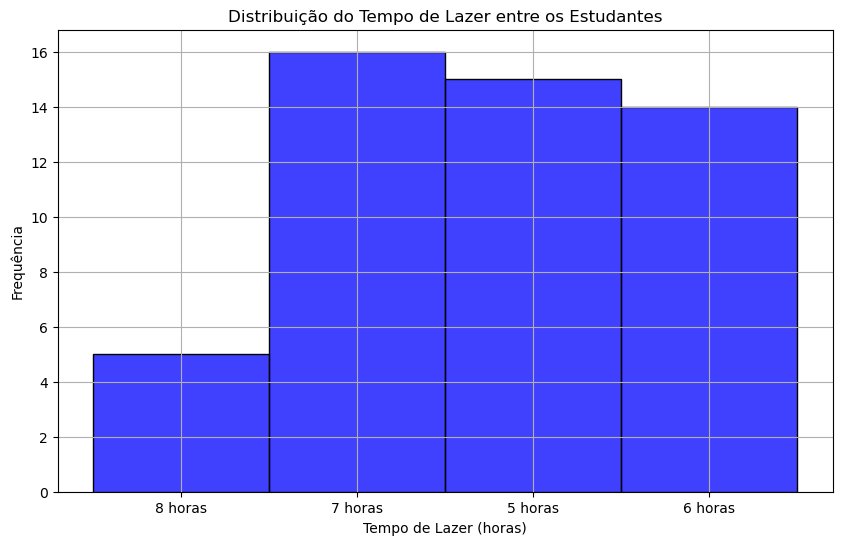

In [85]:
# 4. Qual é a distribuição do tempo de lazer entre os estudantes?
plt.figure(figsize=(10, 6))
sns.histplot(df['Tempo_Lazer'], bins=5, kde=False, color='blue')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição do Tempo de Lazer entre os Estudantes')
plt.xlabel('Tempo de Lazer (horas)')
plt.ylabel('Frequência')

# Adicionar grade
plt.grid(True)

# Exibir o gráfico
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_6768\63463319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transporte_Escola', data=df, palette='Set2')


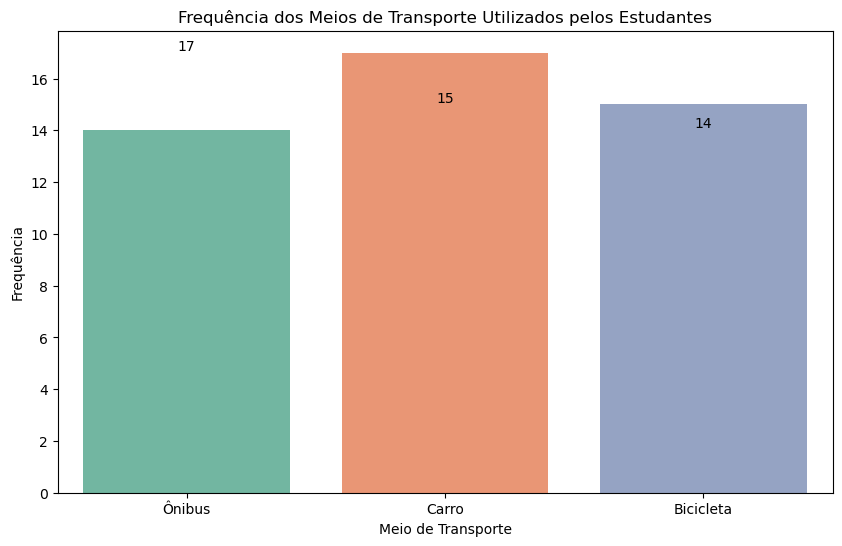

In [103]:
# 6. Qual é o meio de transporte mais utilizado pelos estudantes?
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Transporte_Escola', data=df, palette='Set2')

# Adicionar título e rótulos aos eixos
plt.title('Frequência dos Meios de Transporte Utilizados pelos Estudantes')
plt.xlabel('Meio de Transporte')
plt.ylabel('Frequência')

# Adicionar valores nas barras
for i, count in enumerate(frequencia_transporte):
    plt.text(i, count + 0.1, str(count), ha='center')

# Exibir o gráfico
plt.show()

In [119]:
# 7. Como a presença nas aulas se relaciona com as notas?
df['Presença_Aulas'] = df['Presença_Aulas'].str.rstrip('%').astype(float)

# Verificar o resultado
print(df['Presença_Aulas'].head())

0    90.0
1    85.0
2    95.0
3    70.0
4    80.0
Name: Presença_Aulas, dtype: float64


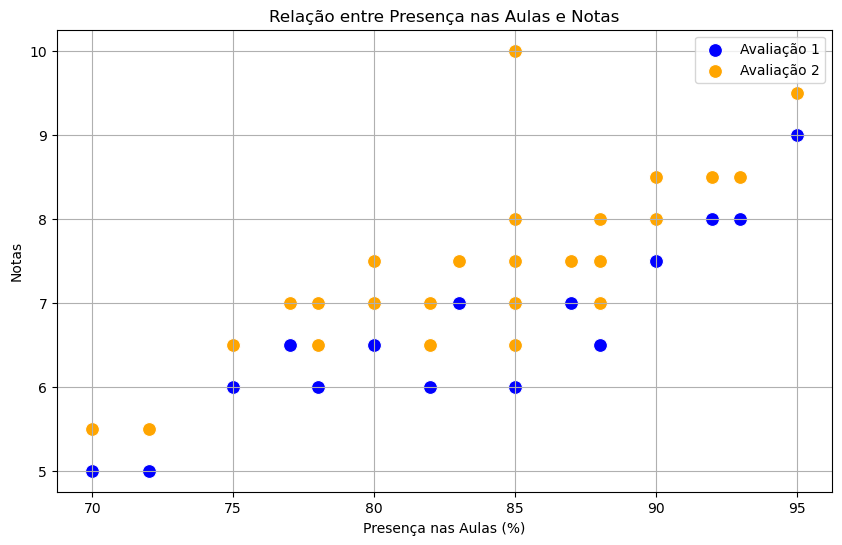

In [121]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Presença_Aulas', y='Nota_Avaliacao_1', data=df, s=100, color='blue', label='Avaliação 1')
sns.scatterplot(x='Presença_Aulas', y='Nota_Avaliacao_2', data=df, s=100, color='orange', label='Avaliação 2')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Presença nas Aulas e Notas')
plt.xlabel('Presença nas Aulas (%)')
plt.ylabel('Notas')

# Adicionar legenda
plt.legend()

# Adicionar grade
plt.grid(True)

# Exibir o gráfico
plt.show()

In [ ]:
# 8. Qual é a correlação entre as notas das duas avaliações?

In [ ]:
# 9. A feature ID é relevante para a análise? Justifique.